In [1]:
#Import Essential Libraries
import sweetviz
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import tpot
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt
import matplotlib

In [2]:
file="all.csv"
df=pd.read_csv(file)
df
# new=df.head(14)
# new

,判決字號,情事變更適用,是否為公共工程,施工地點,情事變更的原因,審級,約款類型,公共工程金額類型
0,最高法院 106 年度台上字第 4 號,是,否,臺中,物價波動,最高法院,物價,NaN
1,臺灣高等法院 99 年度建上更(一)字第 24 號民事判決,否,否,臺北,物價波動,高等法院,否,NaN
2,臺灣高等法院 107 年度建上字第 2 號民事判決,否,否,基隆,物價波動,高等法院,否,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,最高法院 113 年度台上字第 360 號民事判決,是,是,臺中,人為因素,最高法院,否,NaN
...,...,...,...,...,...,...,...,...
233,臺灣高等法院 高雄分院 103 年度建上更(一)字第 5 號民事判決,是,是,高雄,變更設計,高等法院,變更設計,巨額採購
234,臺灣高等法院 臺中分院 106 年度建上字第 29 號民事判決,是,是,臺中,工期展延,高等法院,工期約定,巨額採購
235,臺灣高等法院 106 年度建上更(二)字第 11 號民事判決,否,是,臺北,工期展延,高等法院,工期約定,巨額採購
236,臺灣基隆地方法院 105 年度建字第 14 號民事判決,否,是,基隆,工期展延,地方法院,工期約定,公告金額


In [3]:
condition=df.isnull().any(axis='columns')
df[condition]

,判決字號,情事變更適用,是否為公共工程,施工地點,情事變更的原因,審級,約款類型,公共工程金額類型
0,最高法院 106 年度台上字第 4 號,是,否,臺中,物價波動,最高法院,物價,NaN
1,臺灣高等法院 99 年度建上更(一)字第 24 號民事判決,否,否,臺北,物價波動,高等法院,否,NaN
2,臺灣高等法院 107 年度建上字第 2 號民事判決,否,否,基隆,物價波動,高等法院,否,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,最高法院 113 年度台上字第 360 號民事判決,是,是,臺中,人為因素,最高法院,否,NaN
...,...,...,...,...,...,...,...,...
217,臺灣高等法院 107 年度重上字第 698 號民事判決,否,否,新北,物價波動,高等法院,物價,NaN
220,臺灣高等法院 高雄分院 101 年度建上字第 36 號民事判決,否,否,高雄,物價波動,高等法院,物價,NaN
226,最高法院 110 年度台上字第 1072 號民事判決,是,否,臺中,物價波動,最高法院,物價,NaN
227,臺灣臺中地方法院 111 年度建字第 79 號民事判決,否,否,臺中,物價波動,地方法院,物價,NaN


In [4]:
df['公共工程金額類型'].fillna(value='無', inplace=True)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7656\3321400952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['公共工程金額類型'].fillna(value='無', inplace=True)


,判決字號,情事變更適用,是否為公共工程,施工地點,情事變更的原因,審級,約款類型,公共工程金額類型
0,最高法院 106 年度台上字第 4 號,是,否,臺中,物價波動,最高法院,物價,無
1,臺灣高等法院 99 年度建上更(一)字第 24 號民事判決,否,否,臺北,物價波動,高等法院,否,無
2,臺灣高等法院 107 年度建上字第 2 號民事判決,否,否,基隆,物價波動,高等法院,否,無
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,無
4,最高法院 113 年度台上字第 360 號民事判決,是,是,臺中,人為因素,最高法院,否,無


In [5]:
df = df.dropna()
missing_values_count = df.isnull().sum()

missing_values_sorted = missing_values_count.sort_values(ascending=False)

total_cells = len(df)
missing_percentage = (missing_values_sorted / total_cells) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values_sorted,
                             'Percentage (%)': missing_percentage})

print(missing_data)

          Missing Values  Percentage (%)
判決字號                   0             0.0
情事變更適用                 0             0.0
是否為公共工程                0             0.0
施工地點                   0             0.0
情事變更的原因                0             0.0
審級                     0             0.0
約款類型                   0             0.0
公共工程金額類型               0             0.0


In [6]:
print(df['公共工程金額類型'].value_counts())

公共工程金額類型
無       46
巨額採購    43
查核金額    34
公告金額    23
Name: count, dtype: int64


In [7]:
df.drop(columns=['判決字號'], inplace=True)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_7656\2395517855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['判決字號'], inplace=True)


,情事變更適用,是否為公共工程,施工地點,情事變更的原因,審級,約款類型,公共工程金額類型
0,是,否,臺中,物價波動,最高法院,物價,無
1,否,否,臺北,物價波動,高等法院,否,無
2,否,否,基隆,物價波動,高等法院,否,無
4,是,是,臺中,人為因素,最高法院,否,無
5,是,是,新北,地質因素,高等法院,否,查核金額
...,...,...,...,...,...,...,...
233,是,是,高雄,變更設計,高等法院,變更設計,巨額採購
234,是,是,臺中,工期展延,高等法院,工期約定,巨額採購
235,否,是,臺北,工期展延,高等法院,工期約定,巨額採購
236,否,是,基隆,工期展延,地方法院,工期約定,公告金額


In [8]:
# df.at[14, '約款類型'] = '物價'
# df.at[13, '情事變更的原因'] = '展延'
# df

In [10]:
nominal_columns = [
    '是否為公共工程',
    '施工地點',
    '情事變更的原因',
    '審級',
    '約款類型',
    '公共工程金額類型'
]

In [11]:
data = pd.get_dummies(df, columns=nominal_columns)
data

,情事變更適用,是否為公共工程_否,是否為公共工程_是,施工地點_南投,施工地點_嘉義,施工地點_基隆,施工地點_宜蘭,施工地點_屏東,施工地點_彰化,施工地點_新北,...,約款類型_否,約款類型_天候或自然災害,約款類型_工期約定,約款類型_漏項,約款類型_物價,約款類型_變更設計,公共工程金額類型_公告金額,公共工程金額類型_巨額採購,公共工程金額類型_查核金額,公共工程金額類型_無
0,是,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,否,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,否,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,是,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
5,是,False,True,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,是,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
234,是,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
235,否,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
236,否,False,True,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [11]:
# data.at[14, '約款類型_變更設計'] = True
# data.at[13, '情事變更的原因_物價波動'] = True
# data

In [12]:
data['情事變更適用'].value_counts()

情事變更適用
否    80
是    66
Name: count, dtype: int64

In [13]:
data['情事變更適用'] = data['情事變更適用'].map({'是': 1, '否': 0})

In [14]:
y = data["情事變更適用"]
x = data.drop("情事變更適用", axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9224137931034483
0.6333333333333333


In [17]:
param_grid = {
    'max_depth': [5,10,15,20],  
    'min_samples_leaf': [1,3,5,7]  
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                        cv=10, scoring='f1_weighted', verbose=2)

In [ ]:
grid_search.fit(x_train, y_train)

In [19]:
best_rf = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_leaf': 1}
0.6631766925884574


In [20]:
rf_model = RandomForestClassifier(
    n_estimators=100,      
    max_depth=5,         
    min_samples_leaf=1,     
    random_state=42      
)

rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [25]:
print(rf_model.score(x_train, y_train))
print(rf_model.score(x_test, y_test))

0.8017241379310345
0.5333333333333333


In [26]:
accuracy_rf=cross_val_score(estimator=rf_model,X=x_train,y=y_train,cv=10)
print(accuracy_rf.mean())
rf_f1=cross_val_score(estimator=rf_model,X=x_train,y=y_train, scoring="f1", cv = 10)
print(rf_f1.mean())

0.6712121212121213
0.5957431457431458


In [27]:
feature_importances = rf_model.feature_importances_
print('features:',feature_importances)

features: [0.03659134 0.03382759 0.         0.01328851 0.01636648 0.00210316
 0.00630645 0.02353561 0.0104436  0.01349576 0.00968766 0.00301536
 0.08774831 0.0315615  0.02027165 0.01220669 0.00492683 0.00977369
 0.         0.03850892 0.01120284 0.0088675  0.01920587 0.09645964
 0.0414424  0.01731986 0.06864767 0.01225465 0.02485358 0.06177739
 0.02810548 0.00863241 0.00725767 0.01503853 0.00133979 0.03952547
 0.06041016 0.01975341 0.03314559 0.02224375 0.02885722]


#### SVM

In [28]:
svm=SVC(kernel='rbf',C=1,gamma='auto')
svm.fit(x_train,y_train)

SVC(C=1, gamma='auto')

In [29]:
print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

0.7155172413793104
0.6


In [30]:
accuracy_svm=cross_val_score(estimator=svm,X=x_train,y=y_train,cv=10)
accuracy_svm.mean()

0.6712121212121213

In [31]:
param_grid = {
    'C': np.arange(0.5,2.0,0.2),  
    'gamma': [6,7,8,9,10]
}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

In [ ]:
grid_search_svm.fit(x_train, y_train)

In [33]:
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

{'C': 0.7, 'gamma': 6}
0.5863636363636363


In [34]:
svm_model=SVC(kernel='rbf',C=0.7,gamma=6)
svm_model.fit(x_train,y_train)

SVC(C=0.7, gamma=6)

In [35]:
accuracy_svm_model=cross_val_score(estimator=svm_model,X=x_train,y=y_train,cv=10)
print(accuracy_svm_model.mean())
svm_f1=cross_val_score(estimator=svm_model,X=x_train,y=y_train, scoring="f1", cv = 10)
print(svm_f1.mean())

0.5863636363636363
0.2765873015873016


#### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.6982758620689655
0.6666666666666666


In [38]:
accuracy_knn=cross_val_score(estimator=knn,X=x_train,y=y_train,cv=10)
print(accuracy_knn.mean())
knn_f1=cross_val_score(estimator=knn,X=x_train,y=y_train, scoring="f1", cv = 10)
print(knn_f1.mean())

0.6431818181818182
0.5807936507936508


In [39]:
accuracylistknn= []
f1listknn=[]

for i in range(1,30):
    knn_new = KNeighborsClassifier(n_neighbors = i)
    knn_new.fit(x_train,y_train)
    accuracy_knn_i=cross_val_score(estimator=knn_new,X=x_train,y=y_train,cv=10)
    accuracylistknn.append(accuracy_knn_i.mean())
    f1_knn_i=cross_val_score(estimator=knn_new,X=x_train,y=y_train,scoring="f1",cv=10)
    f1listknn.append(f1_knn_i.mean())

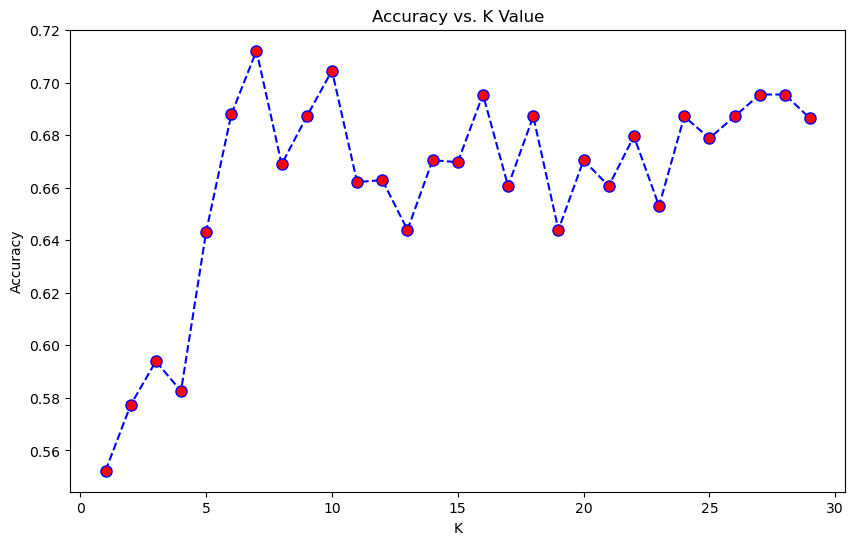

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30),accuracylistknn,color = 'blue',linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

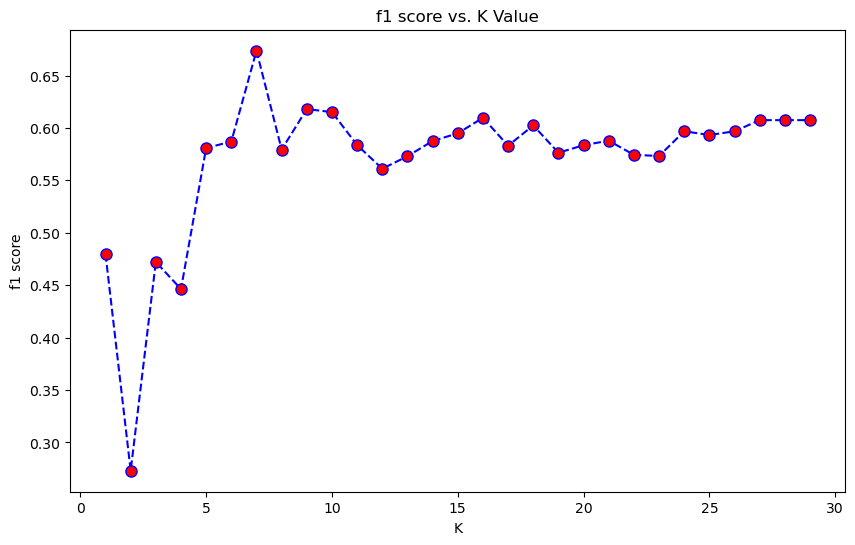

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30),f1listknn,color = 'blue',linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8)
plt.title('f1 score vs. K Value')
plt.xlabel('K')
plt.ylabel('f1 score')
plt.show()

#### 貝式分類器

In [42]:
from sklearn.naive_bayes import GaussianNB

In [44]:
modelg=GaussianNB()
modelg.fit(x_train,y_train)

GaussianNB()

In [45]:
print(modelg.score(x_train,y_train))
print(modelg.score(x_test,y_test))

0.5862068965517241
0.4


In [46]:
accuracy_gnb=cross_val_score(estimator=modelg,X=x_train,y=y_train,cv=10)
print(accuracy_gnb.mean())
gnb_f1=cross_val_score(estimator=modelg,X=x_train,y=y_train, scoring="f1", cv = 10)
print(gnb_f1.mean())

0.5674242424242424
0.6686904761904763


#### XGBoost

In [47]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.2)
# 使用訓練資料訓練模型
xgboostModel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
print('訓練集: ',xgboostModel.score(x_train,y_train))
print('測試集: ',xgboostModel.score(x_test,y_test))

訓練集:  0.8793103448275862
測試集:  0.6


In [49]:
param_grid = {
    'learning_rate': [0.2,0.15,0.1,0.05,0.01],  
    'max_depth': [6,7,8,9,10],
    'n_estimators':range(80,200,20)
}
grid_search_xgb = GridSearchCV(estimator=xgboostModel,
param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

In [ ]:
grid_search_xgb.fit(x_train, y_train)

In [51]:
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 180}
0.6537878787878788


In [52]:
xgb_best = XGBClassifier(n_estimators=180, learning_rate= 0.05,max_depth=10)
xgb_best.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
accuracy_xgb_best=cross_val_score(estimator=xgb_best,X=x_train,y=y_train,cv=10)
print(accuracy_xgb_best.mean())
xgb_f1=cross_val_score(estimator=xgb_best,X=x_train,y=y_train, scoring="f1", cv = 10)
print(xgb_f1.mean())

0.6537878787878788
0.5701875901875901


### Gradient Boosting Machine

In [54]:
# 使用default參數預測
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=10)
gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=10)

In [56]:
print('訓練集: ',gb.score(x_train,y_train))
print('測試集: ',gb.score(x_test,y_test))

訓練集:  0.8620689655172413
測試集:  0.5333333333333333


In [57]:
# 調整參數
from sklearn.model_selection import RandomizedSearchCV


n_estimators = list(range(5,105,5))
max_depths = list(range(1,21))
min_samples_splits = list(range(1,21))
min_samples_leaves = list(range(1,21))
param_grid = {"n_estimators":n_estimators,"max_depth":max_depths,
              "min_samples_split":min_samples_splits,"min_samples_leaf":min_samples_leaves}
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2,n_jobs=-1)
grid_search_gb.fit(x_train, y_train)

Fitting 10 folds for each of 160000 candidates, totalling 1600000 fits


KeyboardInterrupt: 

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor

In [59]:
estimators = [
    ('rf', RandomForestRegressor(random_state = 42)),
    ('svr', svm.SVR()),
    ('knn', KNeighborsRegressor()),
    ('dt', DecisionTreeRegressor(random_state = 42))
]
stacking_model = StackingRegressor(
    estimators=estimators, final_estimator= MLPRegressor(activation = "relu", alpha = 0.1, hidden_layer_sizes = (8,8),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)
)

stacking_model.fit(x_train, y_train)

print("訓練集 Score: ", stacking_model.score(x_train,y_train))
print("測試集 Score: ", stacking_model.score(x_test,y_test))

訓練集 Score:  -0.32027124855572
測試集 Score:  -0.031448650839131176


In [ ]:
accuracy_stacking=cross_val_score(estimator=stacking_model,X=x_train,y=y_train,cv=10)
accuracy_stacking.mean()

-0.21070841812221403

### 結果分析

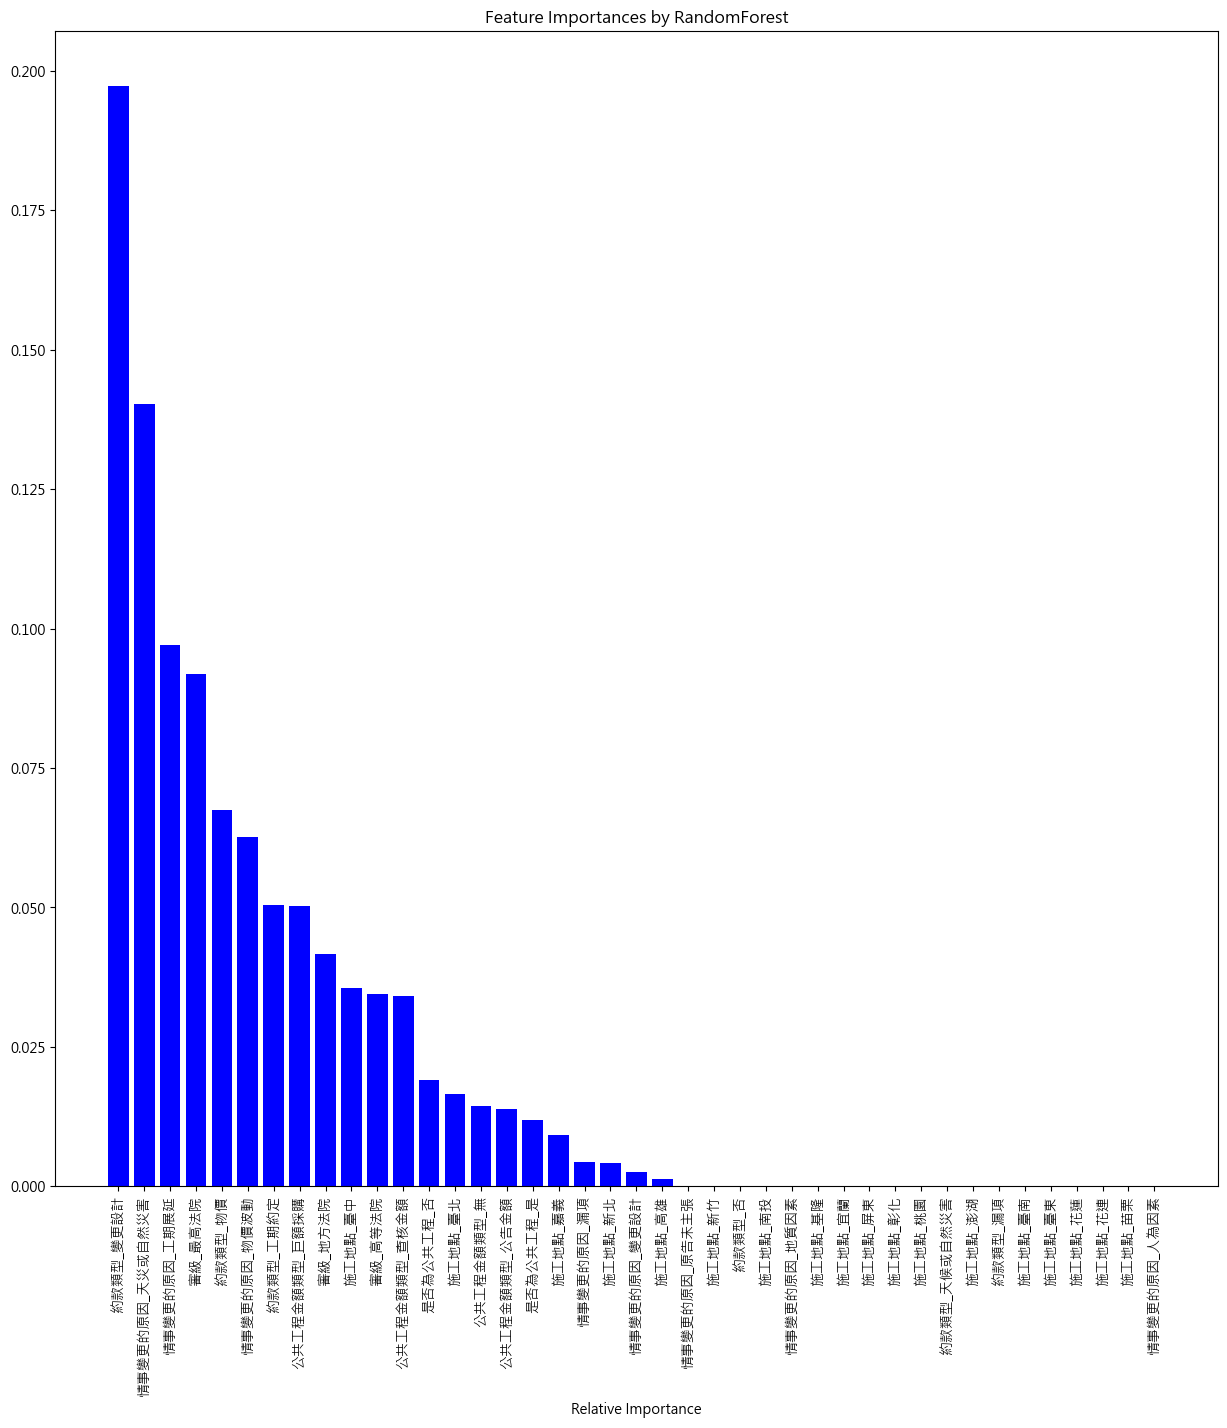

In [ ]:
features = x_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  

sorted_features = pd.DataFrame({'Features': features[indices], 'Importance': importances[indices]})
matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(15, 15))
plt.title('Feature Importances by RandomForest')
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90) #x軸座標文字轉90度
plt.xlabel('Relative Importance')
plt.show()

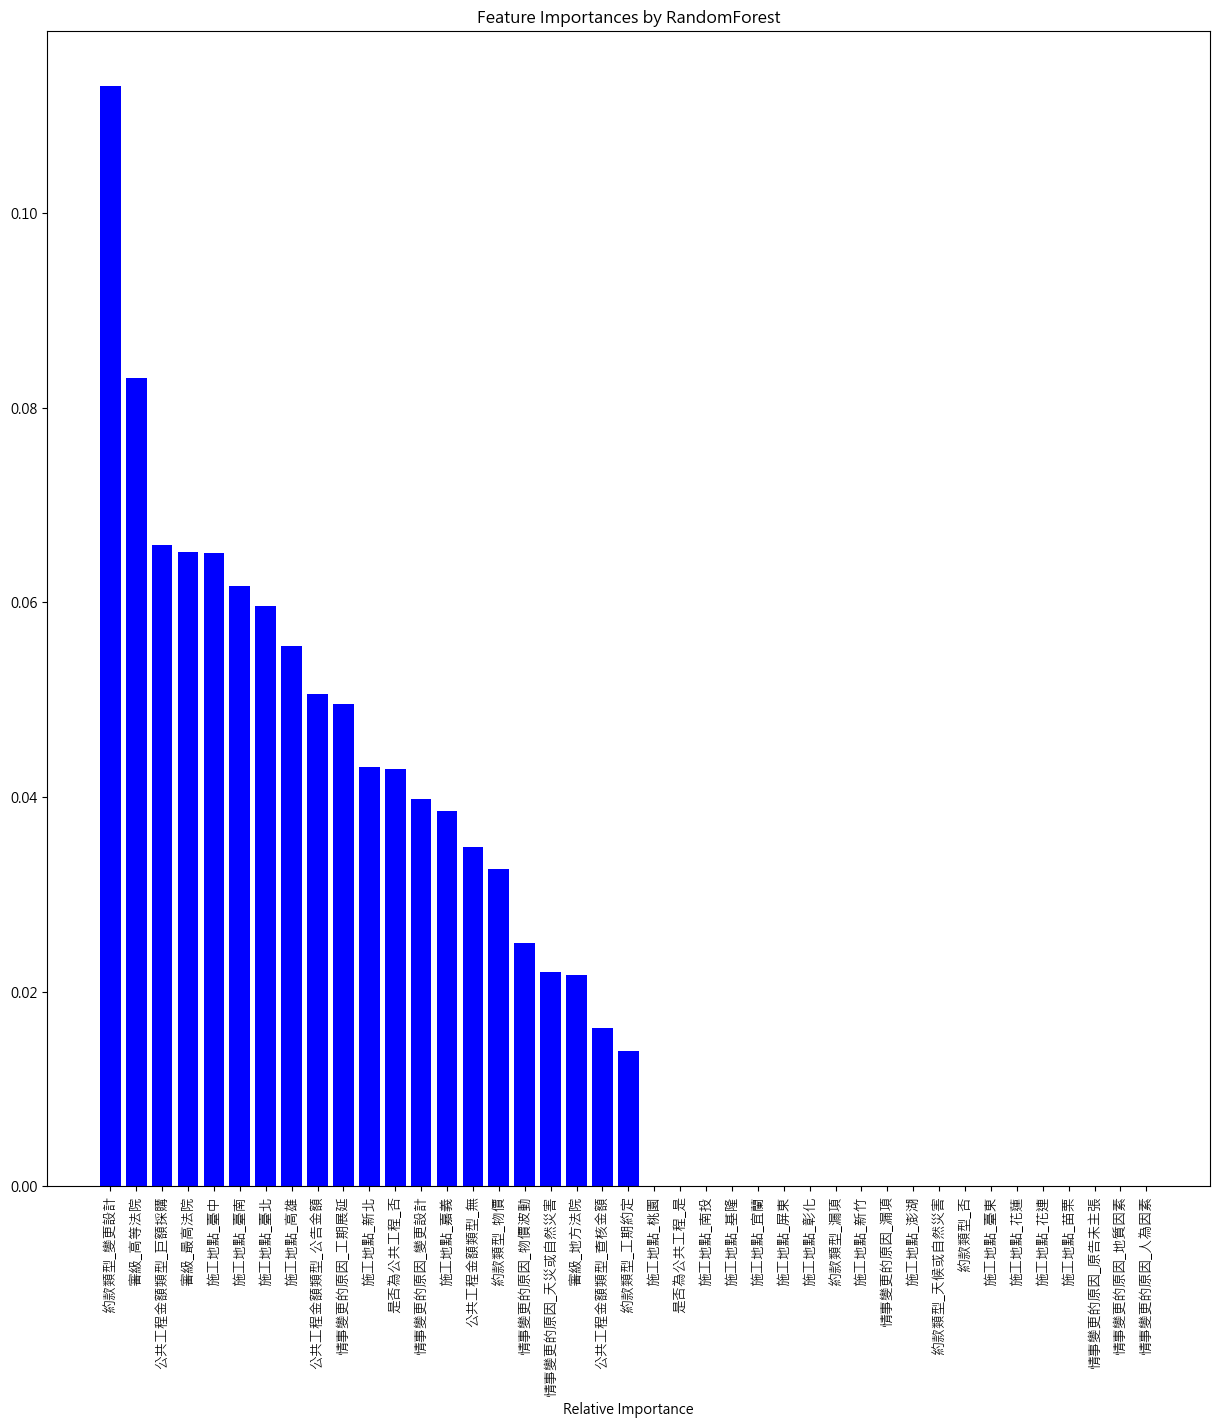

In [60]:
features = x_train.columns
importances = xgb_best.feature_importances_
indices = np.argsort(importances)[::-1]  

sorted_features = pd.DataFrame({'Features': features[indices], 'Importance': importances[indices]})
matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(15, 15))
plt.title('Feature Importances by RandomForest')
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90) #x軸座標文字轉90度
plt.xlabel('Relative Importance')
plt.show()

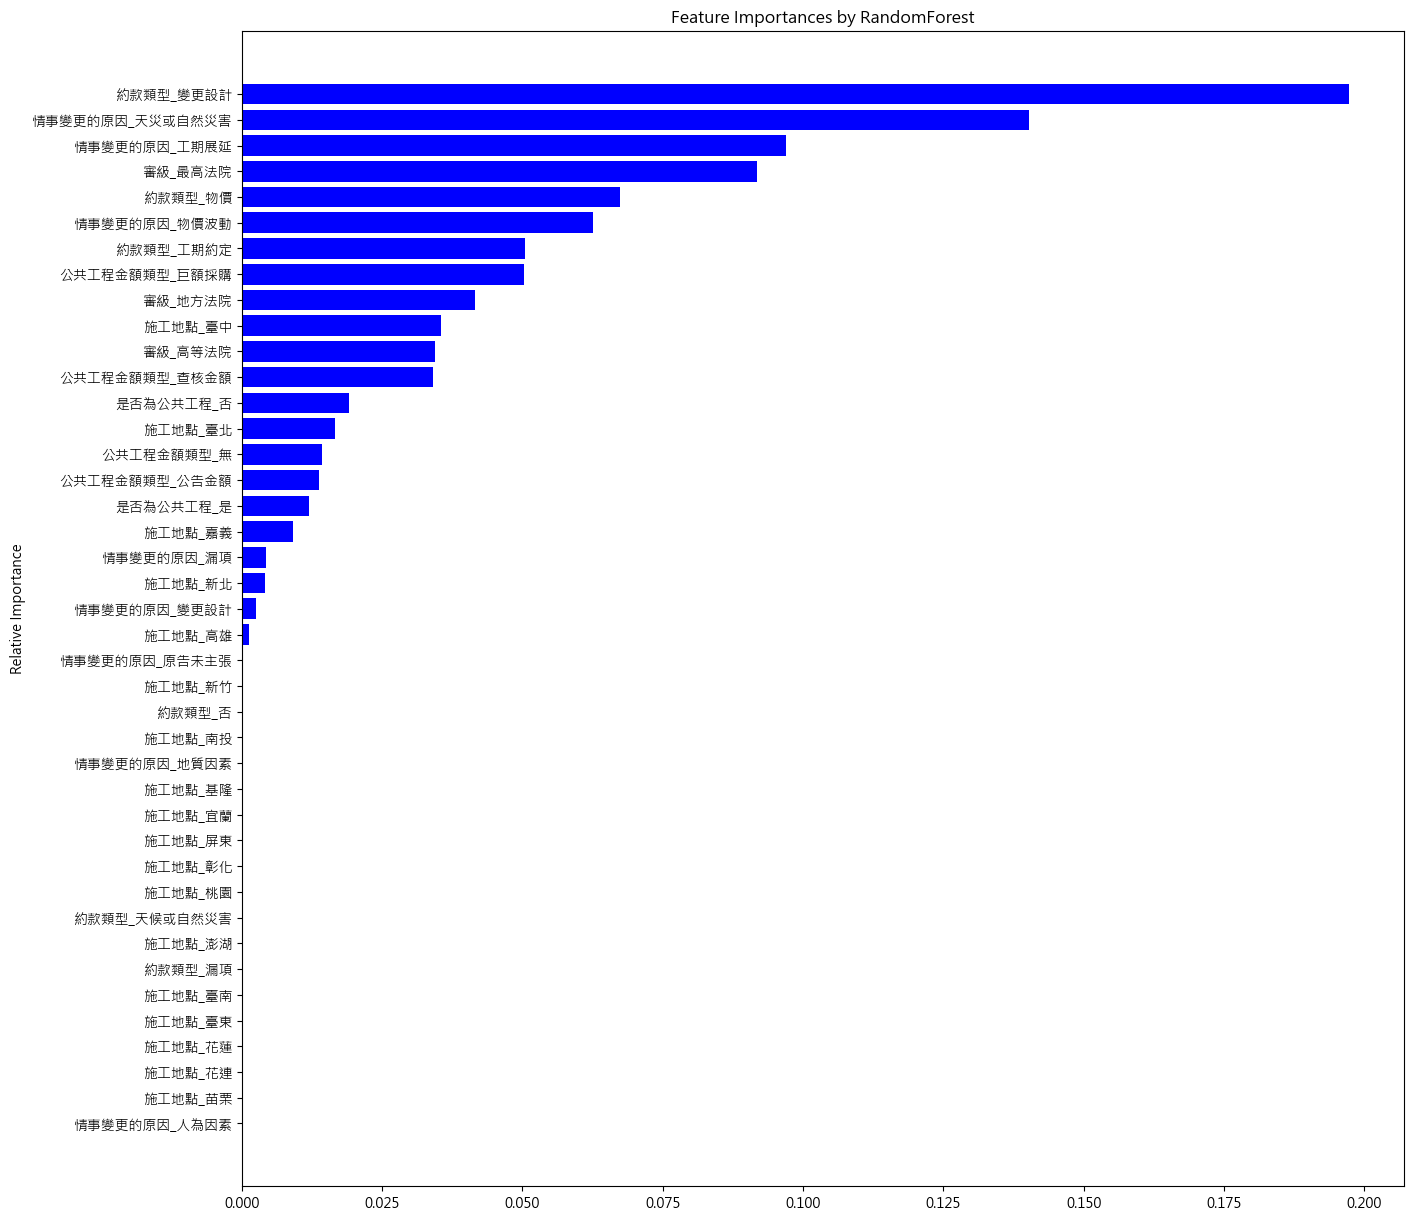

In [ ]:
features = x_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  

sorted_features = pd.DataFrame({'Features': features[indices], 'Importance': importances[indices]})
matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(15, 15))
plt.title('Feature Importances by RandomForest')
plt.barh(range(len(importances)), importances[indices], color='b', align='center')
plt.yticks(range(len(importances)), features[indices],)
plt.ylabel('Relative Importance')
plt.gca().invert_yaxis()  # 反轉y軸，使重要性高的在上面
plt.show()

In [ ]:
sweetviz.analyze(pd.concat([x_train, y_train], axis=1)).show_html("selected.html")

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 2084

Report selected.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
explainer = shap.Explainer(rf_model)

shap_values = explainer.shap_values(x_train)


0


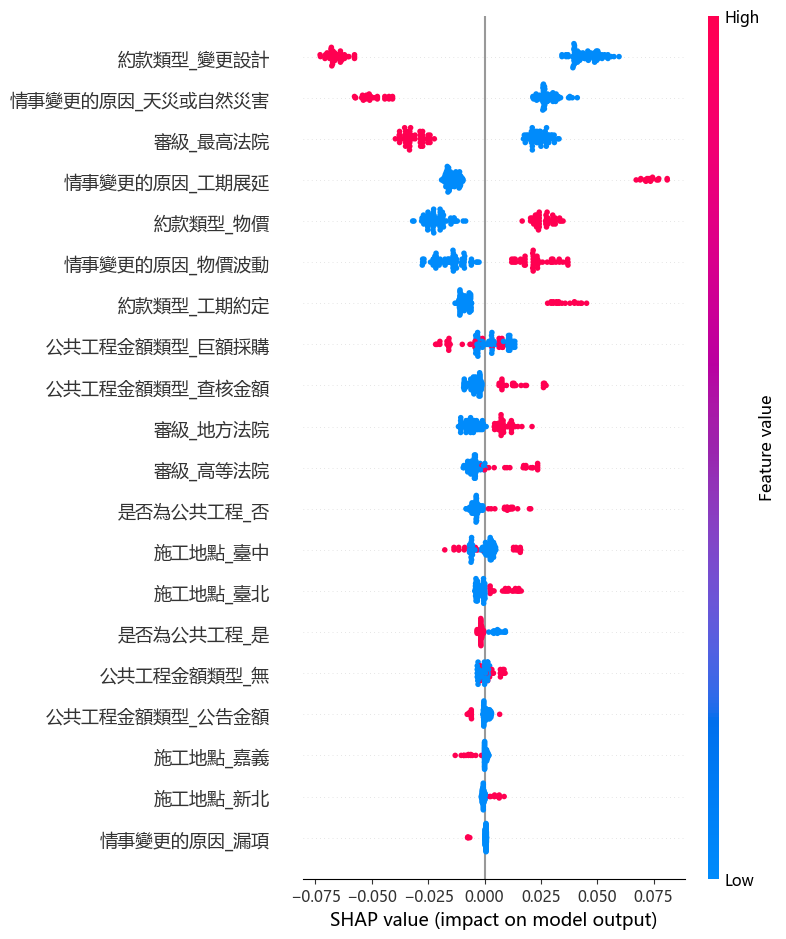

1


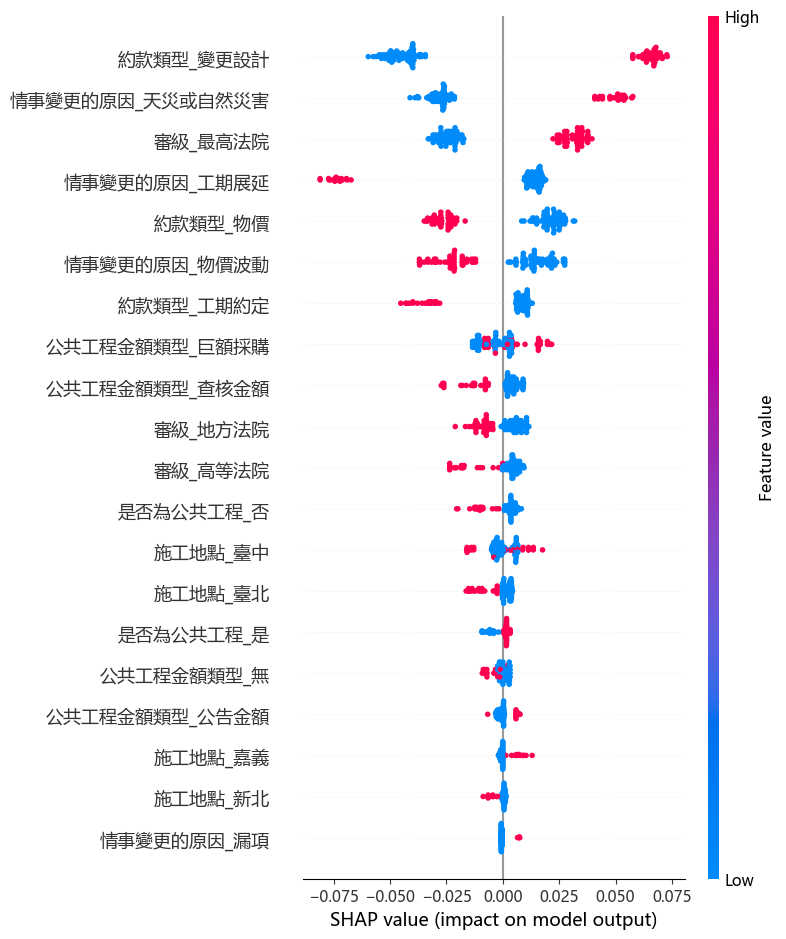

In [ ]:
matplotlib.rc('font', family='Microsoft YaHei')
result_dict = {'有': 1, '無': 0}
class_names=rf_model.classes_
for i in range(2):
    print(class_names[i])
    shap.summary_plot(shap_values[:, :, i], x_train, feature_names=x_train.columns)

In [ ]:
explainer_new = shap.Explainer(rf_model)
shap_values_new = explainer_new(x_train)[:,:,1]
expected_value=explainer_new.expected_value

np.shape(shap_values_new.values)

(116, 41)

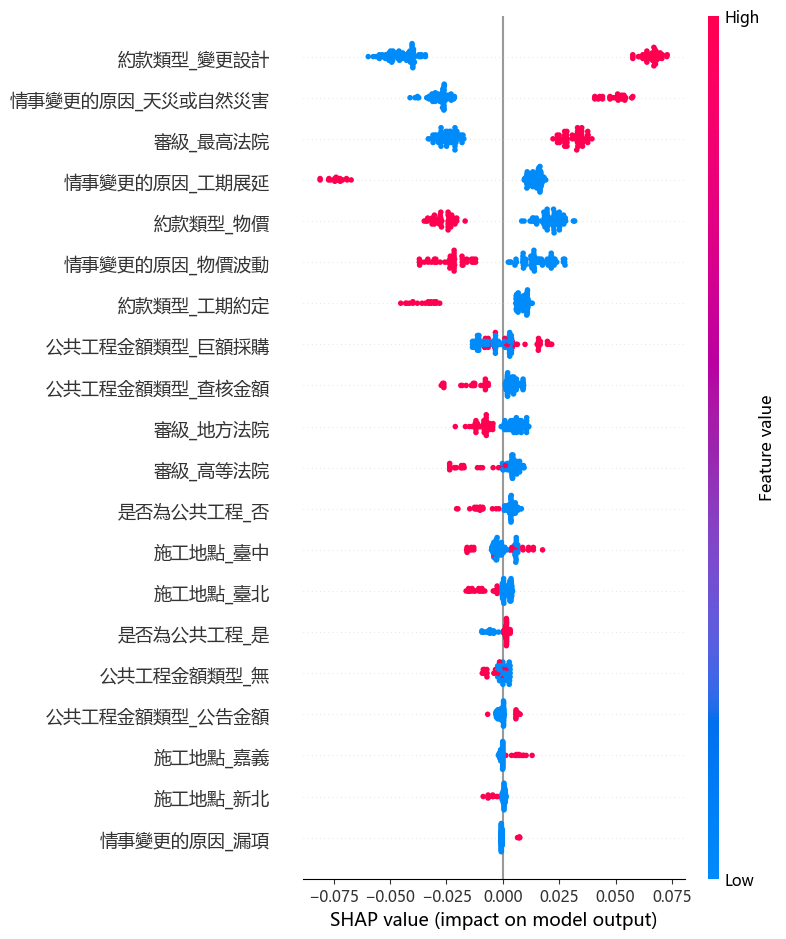

In [ ]:
shap.summary_plot(shap_values_new)

In [ ]:
# shap.plots.force(shap_values_new)
shap.initjs()
shap.force_plot(shap_values_new,plot_cmap="DrDb")
# shap.force_plot(explainer.expected_value, shap_values.values, x_train, plot_cmap="DrDb")

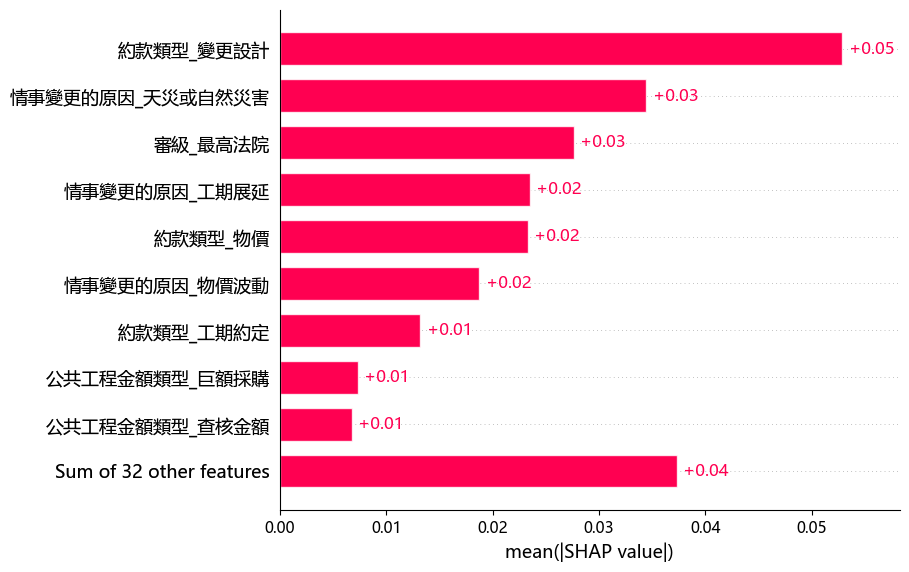

In [ ]:
shap.plots.bar(shap_values_new)

In [ ]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:,"VIP"])

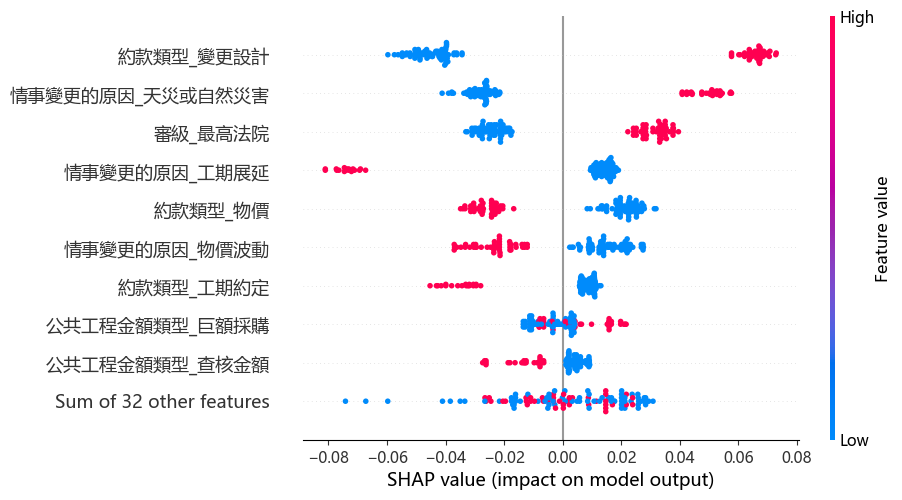

In [ ]:
shap.plots.beeswarm(shap_values_new)